# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

# import warnings
# warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [3]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [4]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

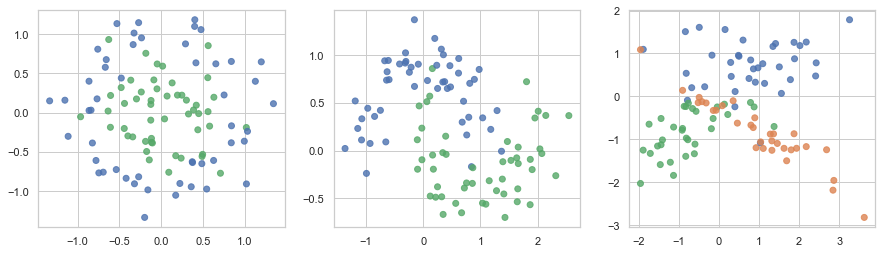

In [5]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [6]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

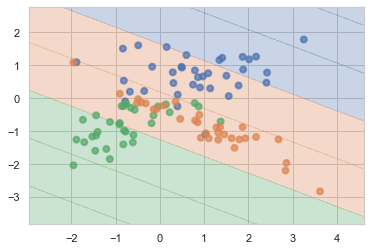

In [7]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

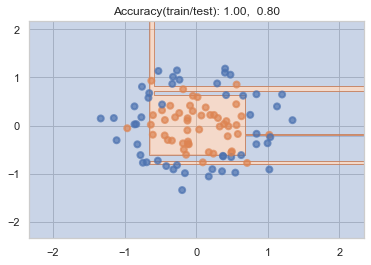

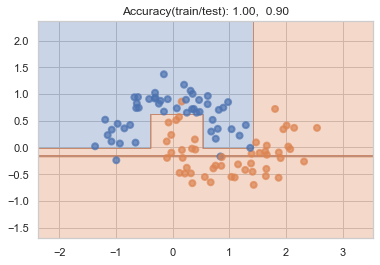

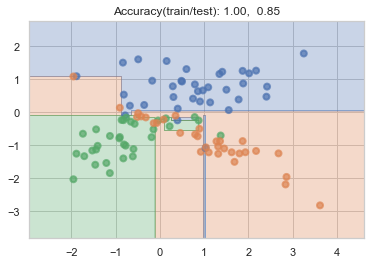

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score

for dset in datasets:
    plt.figure()
    X, y = dset
    X_train, X_test, y_train, y_test = train_test_split(dset[0], dset[1], test_size=0.2, stratify=dset[1], random_state=77)
    tree_clf = DecisionTreeClassifier()
    tree_clf.fit(X_train, y_train)
    y_pred_tr, y_pred_ts = tree_clf.predict(X_train), tree_clf.predict(X_test)
    sc_tr, sc_ts = accuracy_score(y_train, y_pred_tr), accuracy_score(y_test, y_pred_ts)
    plot_surface(tree_clf, X, y)
    plt.title(f"Accuracy(train/test):{sc_tr : .2f}, {sc_ts : .2f}")

__Ответ:__ Деревья для первой и третьей выборок вышли переобученными

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

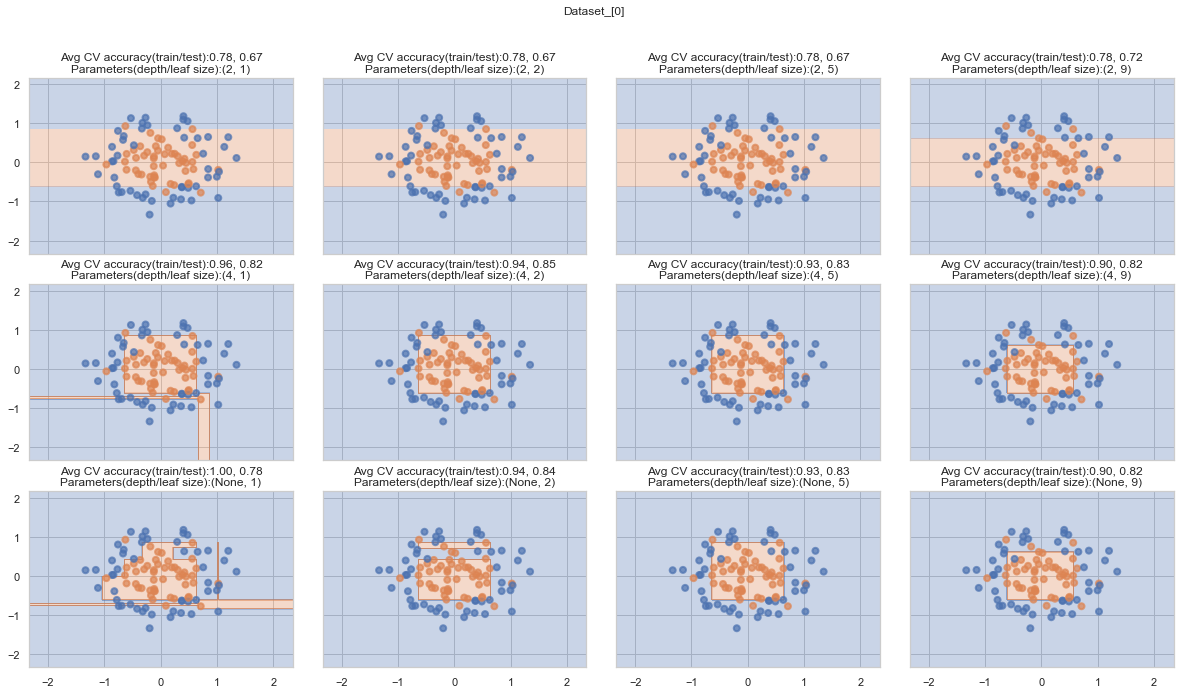

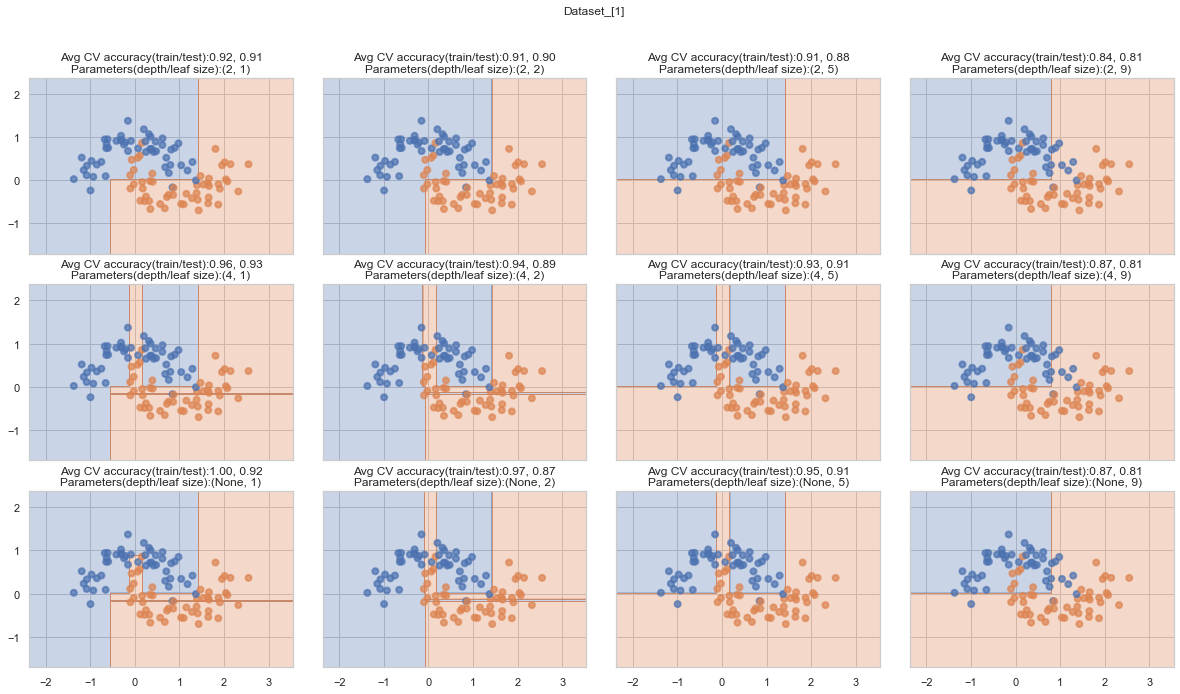

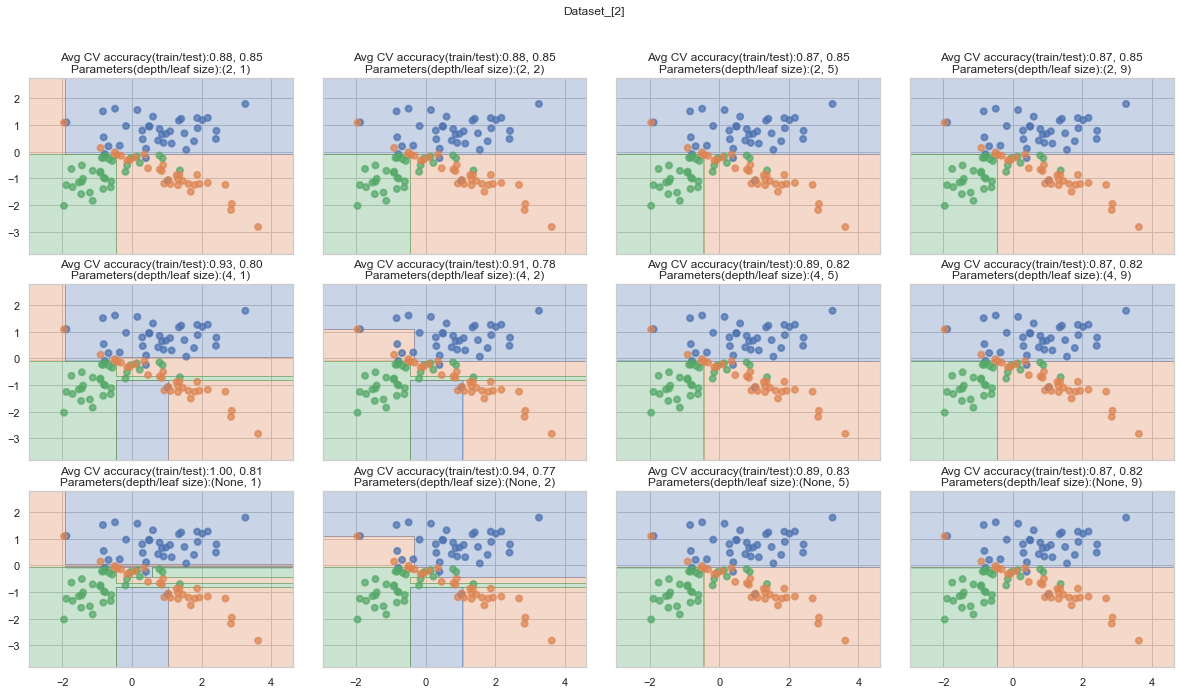

In [9]:
from itertools import product
from sklearn.model_selection import StratifiedKFold

cv_clf = StratifiedKFold(n_splits=4, shuffle=True, random_state=77)

depths = [2, 4, None]
leaf_sz = [1, 2, 5, 9]

accuracies = np.empty((len(datasets), len(depths)*len(leaf_sz), cv_clf.get_n_splits(), 2))
# datasets n_samples = 100 each
clf_res = np.empty((len(datasets), len(depths)*len(leaf_sz), 100 // 4), dtype=int)
best_test_accuracy = 0
best_clf = None

# for i, dset in enumerate(datasets):
for ds_id, dset in enumerate(datasets):
    plt.figure(figsize=(17, 10)).suptitle(f"Dataset_[{ds_id}]")
    for j, (dp, lf_sz) in enumerate(product(depths, leaf_sz)):
        plt.subplot(len(depths), len(leaf_sz), j+1)
        for k, (train_index, test_index) in enumerate(cv_clf.split(dset[0], dset[1])):
            clf = DecisionTreeClassifier(max_depth=dp, min_samples_leaf=lf_sz)
            clf.fit(dset[0][train_index], dset[1][train_index])
            y_pred = clf.predict(dset[0][test_index])
            y_pred_tr, y_pred_ts = clf.predict(dset[0][train_index]), clf.predict(dset[0][test_index])
            sc_tr, sc_ts = accuracy_score(dset[1][train_index], y_pred_tr), accuracy_score(dset[1][test_index], y_pred_ts)
            if best_test_accuracy < sc_ts:
                clf_res[i, j] = y_pred_ts
                best_clf = clf
            accuracies[i, j, k, 0] = sc_tr
            accuracies[i, j, k, 1] = sc_ts
        plot_surface(best_clf, dset[0], dset[1])
        avg_train_acc, avg_test_acc = accuracies[i, j].mean(axis=0)
        plt.title(f"Avg CV accuracy(train/test):{avg_train_acc:.2f}, {avg_test_acc:.2f}\nParameters(depth/leaf size):{dp, lf_sz}")
        if j < len(leaf_sz)*(len(depths) - 1):
            plt.gca().axes.xaxis.set_ticklabels([])
        if j % len(leaf_sz) != 0:
            plt.gca().axes.yaxis.set_ticklabels([])

__Ответ:__ При уменьшении числа объектов выборки в листе и увеличении глубины дерево начинает переобучаться. При фиксированном некотором кол-ве объектов выборки в листе, дерево максимальной глубины показывало лучший результат. Данное поведение одинаково для всех датасетов. 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [10]:
!curl -o "students.csv" "https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7249  100  7249    0     0  68114      0 --:--:-- --:--:-- --:--:-- 71068


In [11]:
from hw5code import DecisionTree

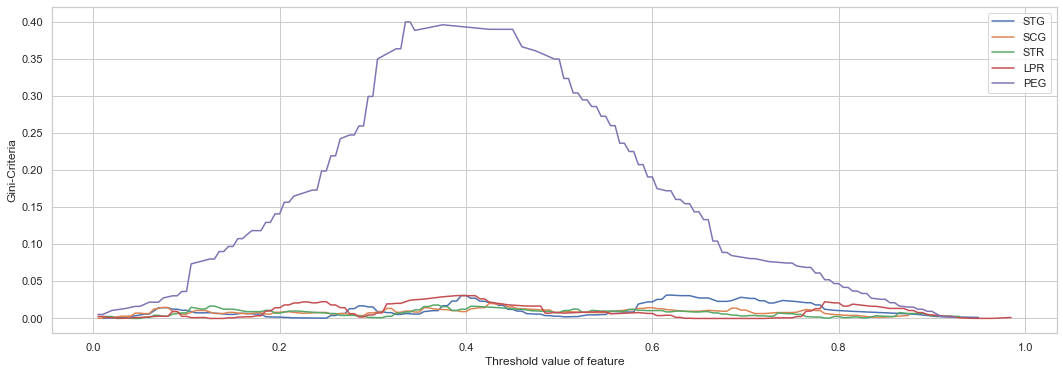

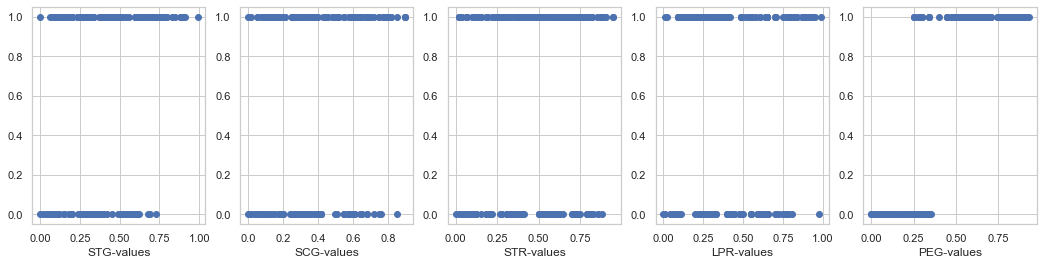

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

df = pd.read_csv('students.csv')
feat, targ = df.iloc[:, :-1], df.iloc[:, -1]
df_results = feat.apply(DecisionTree._find_best_split, axis=0, target_vector=targ.values)

plt.figure(figsize=(18, 6))
for col in df_results.columns: plt.plot(df_results.loc[0, col], df_results.loc[1, col], label=col)
plt.legend()
plt.xlabel("Threshold value of feature")
plt.ylabel("Gini-Criteria")

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(18, 4))
for ax, col in zip(axs.ravel(), feat.columns):
    ax.scatter(feat[col], targ)
    ax.set_xlabel(f"{col}-values")
plt.show();

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

In [13]:
df_results.iloc[3].astype(float).idxmax()

'PEG'

**Ответ:** Исходя из максимального значения критерия деление в корне дерева будет проводится по признаку `PEG`. На `scatter`-графике заметно явное разделение значений признака по классам согласно некоторому порогу. Вид кривой должен быть близок к выпуклому вверх. Кривые плохих для разделения признаков имеют периодический характер

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [14]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_mshrooms = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)

In [16]:
%%time
X_train, X_test, y_train, y_test = train_test_split(
    df_mshrooms.iloc[:, 1:], df_mshrooms.iloc[:, 0], 
    test_size=0.5, stratify= df_mshrooms.iloc[:, 0],
    shuffle=True, random_state=77
)

ppl_mushr0 = make_pipeline(OrdinalEncoder(), DecisionTree(feature_types=["real" for _ in X_train.columns]))
ppl_mushr0.fit(X_train.values, y_train.values)

CPU times: user 7.98 s, sys: 47.8 ms, total: 8.03 s
Wall time: 8.04 s


Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                ('decisiontree', <hw5code.DecisionTree object at 0x16a908430>)])

In [17]:
y_pred = ppl_mushr0.predict(X_test.values)
score = accuracy_score(y_test, y_pred)
print(f"accuracy:{score}", f"; tree depth:{ppl_mushr0.steps[1][1]._depth}")

accuracy:1.0 ; tree depth:7


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [37]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.model_selection import cross_val_score

def score_data(data_title, url, icol_target, target_marks=None):
    df = pd.read_csv(url, header=None)
    if data_title == "nursery":
        df.drop(columns=[7], inplace=True)
    if not target_marks is None:
        pos_marks, neg_marks = target_marks
        df.loc[:, icol_target].replace(to_replace=pos_marks + neg_marks, value=[0 for _ in pos_marks] + [1 for _ in neg_marks], inplace=True)

    X = df.loc[:, [i for i in range(len(df.columns)) if not ((i == icol_target) or (data_title == 'nursery' and i == 7))]]
    y = df.loc[:, icol_target]
    
    estimators = {
        'MyTree_allreal_ordinal': make_pipeline(OrdinalEncoder(), DecisionTree(feature_types=["real" for _ in X.columns])),
        'MyTree_allcategor': DecisionTree(feature_types=["categorical" for _ in X.columns]),
        'SklearnTree_ordinal': make_pipeline(OrdinalEncoder(), DecisionTreeClassifier(min_samples_leaf=3))
    }

    cv_clf = StratifiedKFold(n_splits=10, shuffle=True)
    return pd.Series(
        {clf_ttl: cross_val_score(estimator=estmtr, X=X.values, y=y.values, cv=cv_clf, scoring='accuracy', n_jobs=10).mean() for clf_ttl, estmtr in estimators.items()},
        name=data_title
    )

In [38]:
%%time
res = pd.DataFrame(
    [
        score_data(
            data_title="mushrooms",
            url="https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", 
            icol_target=0
        ),
        score_data(
            data_title="tic-tac-toe",
            url="https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data", 
            icol_target=9
        ),
        score_data(
            data_title="cars",
            url="https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data",
            icol_target=6,
            target_marks=(['good', 'vgood'], ['unacc', 'acc'])
        ),
        score_data(
            data_title="nursery",
            url="https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data",
            icol_target=8,
            target_marks=(['not_recom', 'recommend'], ['very_recom', 'priority', 'spec_prior'])
        )
    ]
)
res

CPU times: user 505 ms, sys: 57.5 ms, total: 562 ms
Wall time: 1min 14s


,MyTree_allreal_ordinal,MyTree_allcategor,SklearnTree_ordinal
mushrooms,1.000000,0.999754,1.000000
tic-tac-toe,0.801743,0.867379,0.855943
cars,0.972802,0.973958,0.986107
nursery,0.651620,0.657176,0.418750


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания: